# Importacion de Librerias


In [ ]:
#Libreria para leer archivos como datasets
import pandas as pd
import numpy as np
#Operaciones matematicas en el dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#Error absoluto
from sklearn.metrics import mean_absolute_error
#Metricas de evaluacion
from numpy.core.fromnumeric import mean

# Importacion y analisis del dataset


In [ ]:
#Leer el dataset usando pandas y guardarlo en la matriz df
df = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [ ]:
#Primera visualizacion del dataset
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [ ]:
#Comprobar si existen valores null en alguna columna del dataset
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
#Informacion util del dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34139.0,82.773611,82.135694,3.0000,22.00,58.0,114.00,898.0
PM10,34346.0,110.060391,95.223005,2.0000,38.00,87.0,155.00,984.0
SO2,34129.0,17.375901,22.823017,0.2856,3.00,9.0,21.00,341.0
NO2,34041.0,59.305833,37.116200,2.0000,30.00,53.0,82.00,290.0
CO,33288.0,1262.945145,1221.436236,100.0000,500.00,900.0,1500.00,10000.0


In [ ]:
#Informacion de las columnas del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


# Limpieza del dataset

In [ ]:
#Llenar los valores nulos con la media de sus columnas
df = df.fillna(df.mean())

<ipython-input-7-4836b1b44cae>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
#Comprobar si existen valores null en alguna columna del dataset
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

In [ ]:
#Aplicar LabelEncoder para convertir variables categoricas a numericas
le = preprocessing.LabelEncoder()
df['wd'] = le.fit_transform(df['wd'])

In [ ]:
#Eliminar la columna "station" ya que no aporta informacion relevante
#debido a que toda la data proviene de esa estacion
df = df.drop('station',axis=1)

In [ ]:
#Visualizacion de la data 100% con valores numericos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      35064 non-null  int64  
 1   year    35064 non-null  int64  
 2   month   35064 non-null  int64  
 3   day     35064 non-null  int64  
 4   hour    35064 non-null  int64  
 5   PM2.5   35064 non-null  float64
 6   PM10    35064 non-null  float64
 7   SO2     35064 non-null  float64
 8   NO2     35064 non-null  float64
 9   CO      35064 non-null  float64
 10  O3      35064 non-null  float64
 11  TEMP    35064 non-null  float64
 12  PRES    35064 non-null  float64
 13  DEWP    35064 non-null  float64
 14  RAIN    35064 non-null  float64
 15  wd      35064 non-null  int64  
 16  WSPM    35064 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 4.5 MB


In [ ]:
#Calculo del AQI y asignarlo como una nueva columan en el dataset
contaminantes = ['SO2', 'NO2', 'PM10', 'CO', 'O3']
df['AQI'] = df[contaminantes].max(axis=1)

In [ ]:
#Eliminamos las columnas de los contaminantes ya que tenemos el calculo del AQI
df = df.drop('SO2',axis=1)
df = df.drop('NO2',axis=1)
df = df.drop('PM10',axis=1)
df = df.drop('CO',axis=1)
df = df.drop('O3',axis=1)

In [ ]:
#Visualizacion del dataset despues d realizar los cambios
df

,No,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM,AQI
0,1,2013,3,1,0,4.0,-0.7,1023.0,-18.8,0.0,6,4.4,300.0
1,2,2013,3,1,1,8.0,-1.1,1023.2,-18.2,0.0,3,4.7,300.0
2,3,2013,3,1,2,7.0,-1.1,1023.5,-18.2,0.0,6,5.6,300.0
3,4,2013,3,1,3,6.0,-1.4,1024.5,-19.4,0.0,7,3.1,300.0
4,5,2013,3,1,4,3.0,-2.0,1025.2,-19.5,0.0,3,2.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,12.5,1013.5,-16.2,0.0,7,2.4,400.0
35060,35061,2017,2,28,20,13.0,11.6,1013.6,-15.1,0.0,14,0.9,500.0
35061,35062,2017,2,28,21,16.0,10.8,1014.2,-13.3,0.0,7,1.1,700.0
35062,35063,2017,2,28,22,21.0,10.5,1014.4,-12.9,0.0,6,1.2,700.0


# Preprocesamiento de datos

<Axes: title={'center': 'Pearson'}>

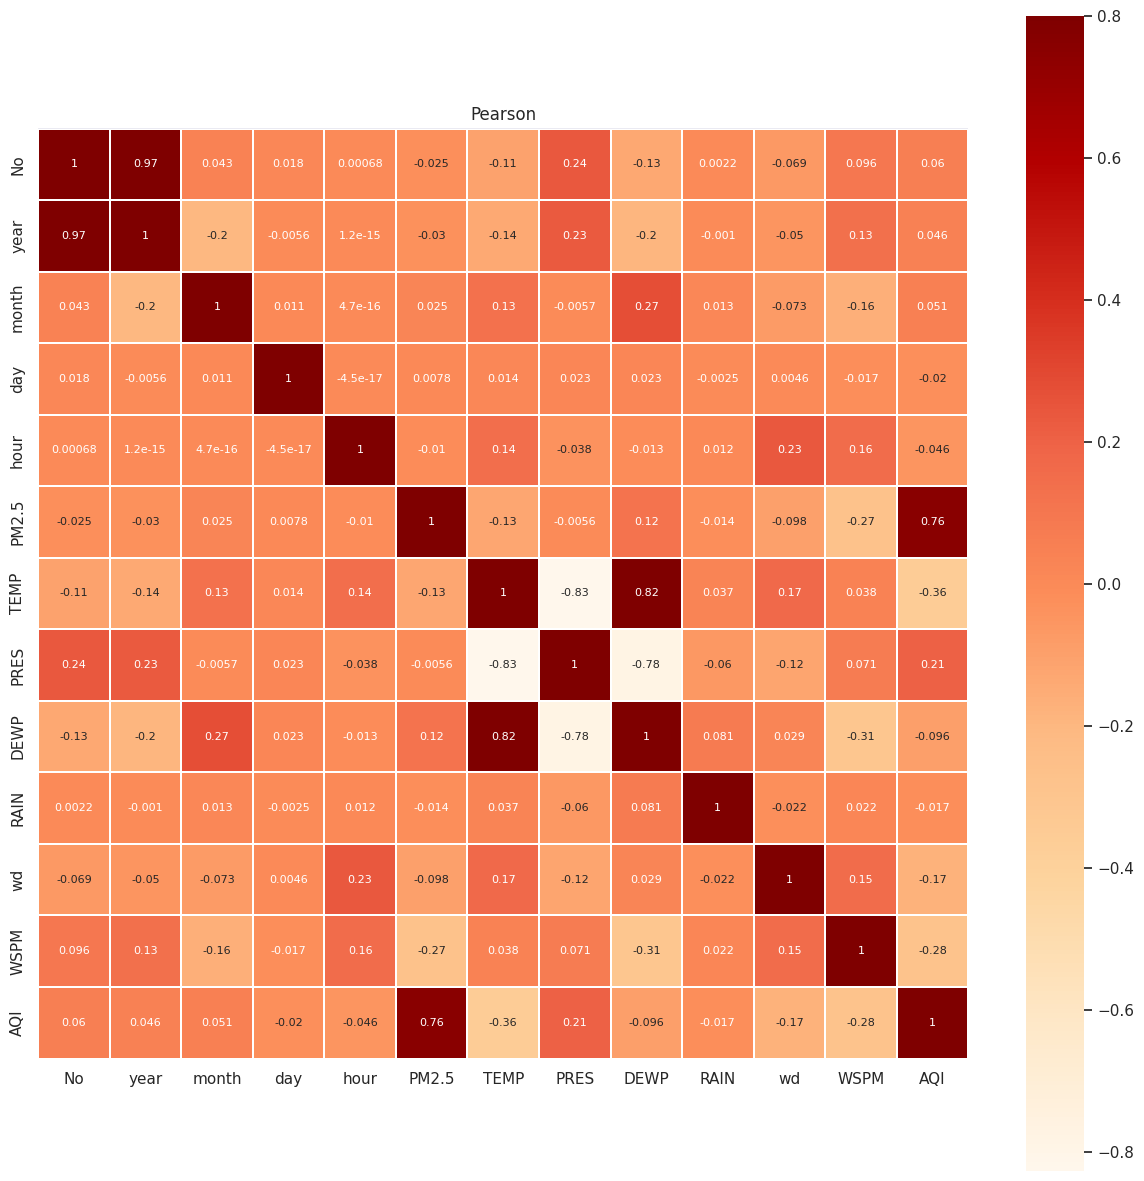

In [ ]:
#Analisis de Pearson
sns.set(style='dark', palette='pastel', font='sans-serif', font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.8,square=True,cmap='OrRd',annot=True,annot_kws={"size":8})

<ipython-input-16-b1c7321c7ffe>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'PRES'}>],
       [<Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>, <Axes: title={'center': 'wd'}>,
        <Axes: title={'center': 'WSPM'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

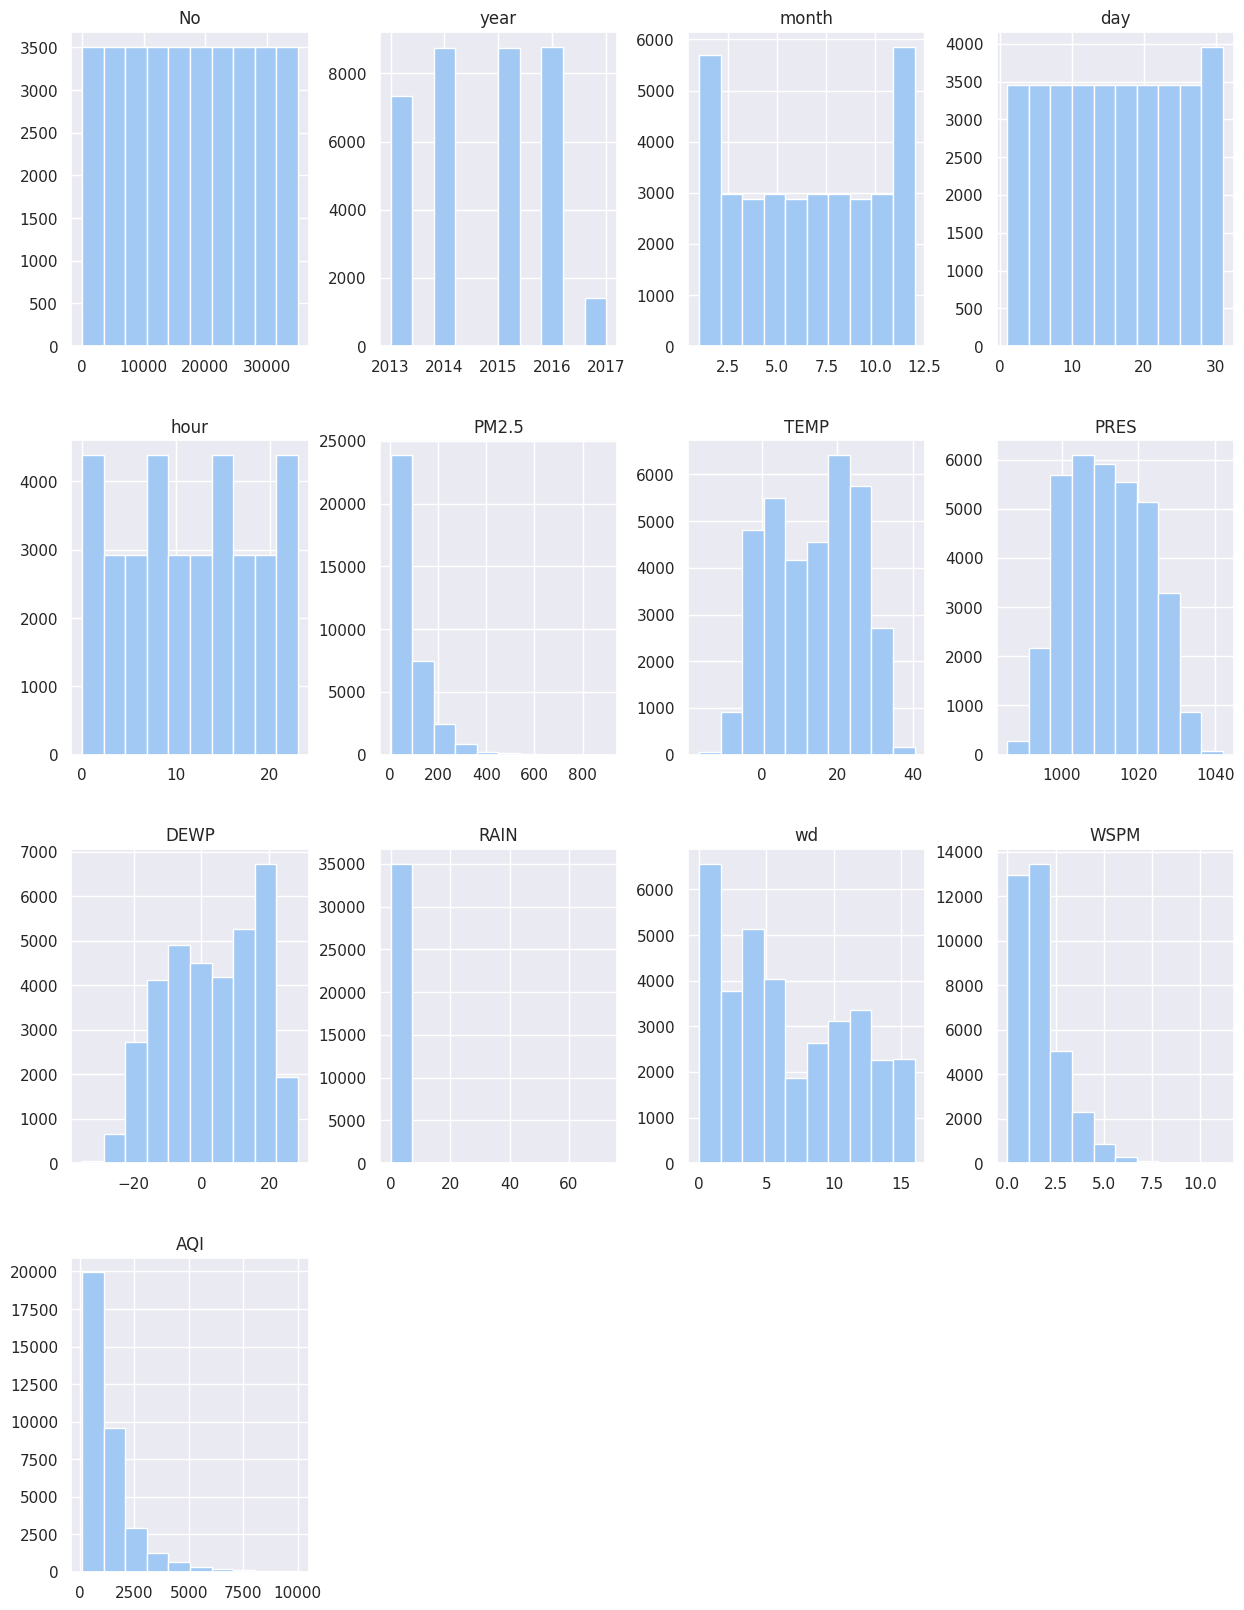

In [ ]:
#Mostrar la distribucion de cada columna para decidir la funcion de activacion
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [ ]:
#Segun el diagrama de coorrelacion de pearson existe una columna que influye demsiado en el valor del AQI
#Procedemos a eliminar la columna "PM2.5" para no hacer al modelo tan dependiente de ese dato
df = df.drop('PM2.5',axis=1)


# Preparar el entrenamiento

In [ ]:
#Borrar la columna de AQI, ya que esta sera nuestra clase a predecir
#En x se esta guardando el dataframe sin la columna AQI
x = df.drop('AQI',axis=1)
#En y se esta guardando unicamente la columna AQI original
y = df['AQI']

In [ ]:
#Escalar los datos con valores entre 0 y 1
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

In [ ]:
#Crear el dataset de entrenamiento y el dataset de testeo
#Datos con x, datos que usara para entrenar
#Datos con y, datos que usara para testear lo entrenado

#X_train son los datos con los que entrena y el modelo tiene acceso al
#resultado en Y_train

#x_test son los datos con los que se testea lo aprendido sin saber
#si esta bien o mal (resultado obtenido)

#y_test se utiliza para comprar la eficiencia del modelo (resultado esperado)
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20)

# Creacion del modelo predictivo

In [ ]:
#Modelo ANN
ann = Sequential()
ann.add(Dense(25,activation='relu'))
ann.add(Dense(19,activation='relu'))
ann.add(Dense(14,activation='relu'))
ann.add(Dense(7,activation='relu'))
ann.add(Dense(1))

In [ ]:
#Compilacion del modelo
ann.compile(optimizer='adam', loss='mse')

In [ ]:
#Entrenamiento del modelo
ann.fit(x=X_train,y=Y_train,validation_data=(x_test,y_test),batch_size=200,epochs=50,verbose=1)

Epoch 1/50
123/123 [==============================] - 2s 5ms/step - loss: 2954544.5000 - val_loss: 2954002.0000
Epoch 2/50
123/123 [==============================] - 0s 3ms/step - loss: 2140703.2500 - val_loss: 1553066.7500
Epoch 3/50
123/123 [==============================] - 0s 3ms/step - loss: 1491451.8750 - val_loss: 1517173.8750
Epoch 4/50
123/123 [==============================] - 0s 3ms/step - loss: 1457380.2500 - val_loss: 1478697.1250
Epoch 5/50
123/123 [==============================] - 0s 3ms/step - loss: 1416329.3750 - val_loss: 1433411.2500
Epoch 6/50
123/123 [==============================] - 0s 4ms/step - loss: 1367815.7500 - val_loss: 1378671.8750
Epoch 7/50
123/123 [==============================] - 0s 3ms/step - loss: 1313890.8750 - val_loss: 1321544.2500
Epoch 8/50
123/123 [==============================] - 0s 4ms/step - loss: 1257445.5000 - val_loss: 1262745.6250
Epoch 9/50
123/123 [==============================] - 0s 4ms/step - loss: 1204800.5000 - val_loss: 12160

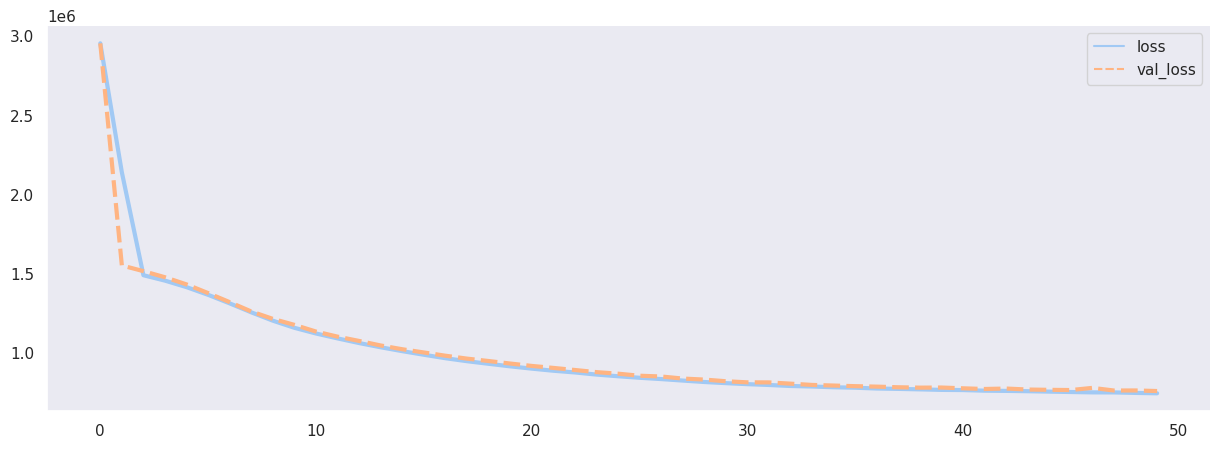

In [ ]:
#Grafica de comparacion entre loss y val_loss
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

# Testeo de la prediccion con el modelo actual

In [ ]:
#Valores predichos por el modelo
y_pred = ann.predict(x_test)

329/329 [==============================] - 1s 2ms/step


In [ ]:
#Error medio absoluto
print(mean_absolute_error(y_test,y_pred))

582.5338350412251


In [ ]:
#Comprar la precicion del modelo con una columna al azar del dataset
test = df.drop('AQI',axis=1).iloc[0]
print(test)
print(df.iloc[0]['AQI'])

No          1.0
year     2013.0
month       3.0
day         1.0
hour        0.0
TEMP       -0.7
PRES     1023.0
DEWP      -18.8
RAIN        0.0
wd          6.0
WSPM        4.4
Name: 0, dtype: float64
300.0


In [ ]:
#Aplicar un escalado de los valores para que el modelo los entienda
test = scaler.transform(test.values.reshape(-1,11))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
#Prediccion usando el modelo
print("Este es el valor de prediccion: ",ann.predict(test)[0,0])

1/1 [==============================] - 0s 38ms/step
Este es el valor de prediccion:  546.3437


In [ ]:
#PRESICION DEL MODELO
ACC = mean_absolute_error(y_test,y_pred)/np.mean(y)
print("Error: ",mean_absolute_error(y_test,y_pred))
print("Media: ",np.mean(y))
print("Acc: ",round((1-ACC)*100),"%")

Error:  582.5338350412251
Media:  1263.4979631025096
Acc:  54 %
